In [5]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [6]:
dataset=pd.read_csv("C:/Users/56961/Desktop/Proyecto ML CEN/dataset.csv/dataset.csv",sep=";")

In [7]:
dataset.drop(["node"],inplace=True,axis=1)

In [8]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [10]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [11]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")
train.head()

,consumption,substation,date
114231,-0.404716,AJAHUEL,2019-08-01
114232,-175.844684,BUIN,2019-08-01
114233,98.995407,BUIN,2019-08-01
114234,25.594385,LOSALME,2019-08-01
114235,78.314818,LOSALME,2019-08-01


In [12]:
test=dataset.query("date.dt.year==2022")

In [13]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [14]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [15]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [16]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [17]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

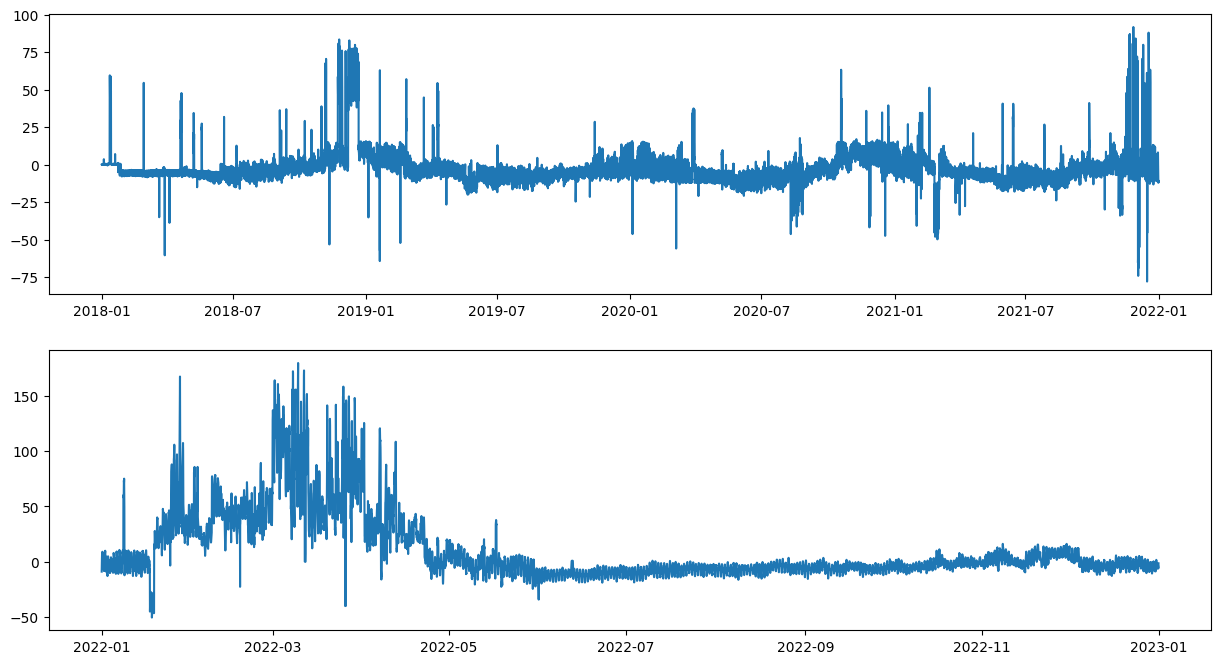

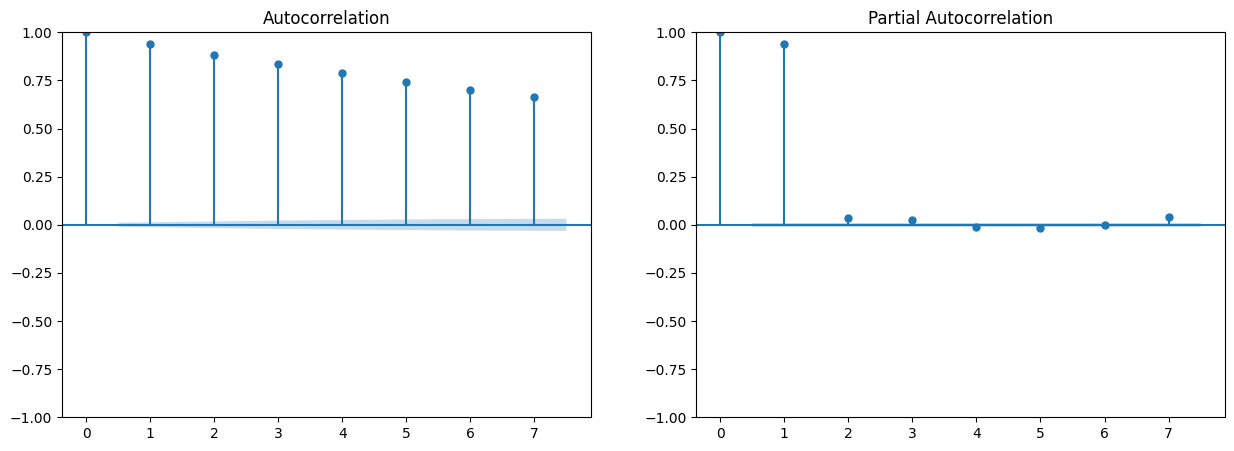

In [18]:
subestacion="FLORIDA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [19]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

In [20]:
data["year"]=data["date"].dt.year
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


,consumption,date,day,hour,month,year
date,,,,,,
2018-01-01 00:00:00,0.219616,2018-01-01 00:00:00,1,0,1,2018
2018-01-01 01:00:00,0.102980,2018-01-01 01:00:00,1,1,1,2018
2018-01-01 02:00:00,0.099852,2018-01-01 02:00:00,1,2,1,2018
2018-01-01 03:00:00,0.068052,2018-01-01 03:00:00,1,3,1,2018
2018-01-01 04:00:00,0.031040,2018-01-01 04:00:00,1,4,1,2018


In [21]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys_florida.csv")

In [22]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys_florida.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

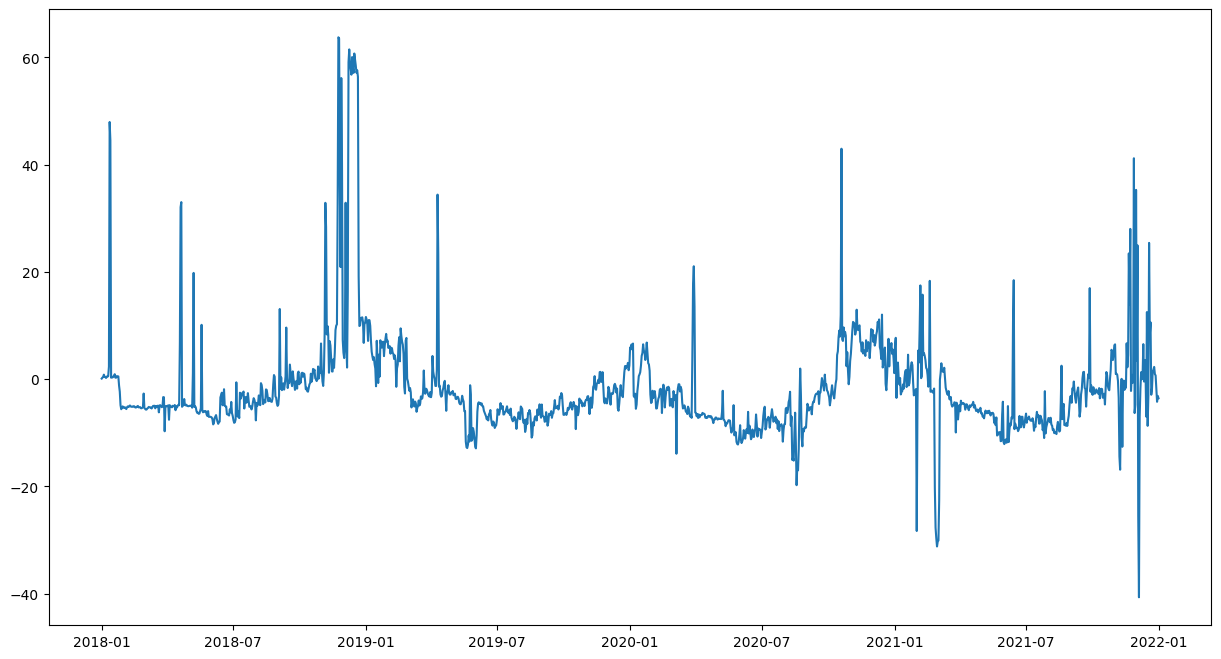

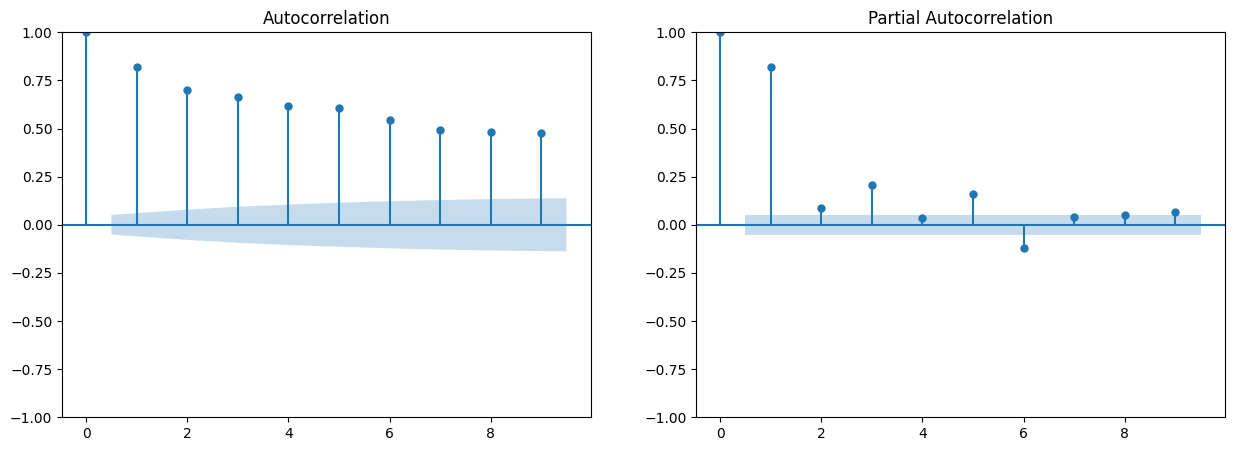

In [23]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.756012
p-value: 0.003391
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [26]:
modelo_florida_d=ARIMA(ys,order=(3,1,5))
m_ad1=modelo_florida_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 28.455864802940365
AIC 9049.390392893718
MAPE 1.6402803868559677


In [27]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np

In [28]:
# Encontrar el mejor modelo ARIMA
modelo_auto = auto_arima(ys, seasonal=False, trace=True)

# Obtener los términos óptimos del modelo ARIMA
best_order = modelo_auto.get_params()['order']

# Ajustar el modelo ARIMA con los términos óptimos
modelo_florida_d = ARIMA(ys, order=best_order)
m_ad1 = modelo_florida_d.fit()

# Calcular el error cuadrático medio
mse = m_ad1.mse

# Calcular el criterio de información de Akaike (AIC)
aic = m_ad1.aic

# Realizar predicciones
ysp = m_ad1.predict()

# Calcular el error porcentual absoluto medio (MAPE)
mape = mean_absolute_percentage_error(ys, ysp)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("AIC:", aic)
print("MAPE:", mape)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9097.151, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9326.766, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9285.248, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9239.045, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9324.766, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9128.715, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9126.085, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9085.981, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9104.642, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9087.968, Time=0.81 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9064.363, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9084.356, Time=0.60 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=9065.422, Time=0.87 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=9064.337, Time=1.32 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept

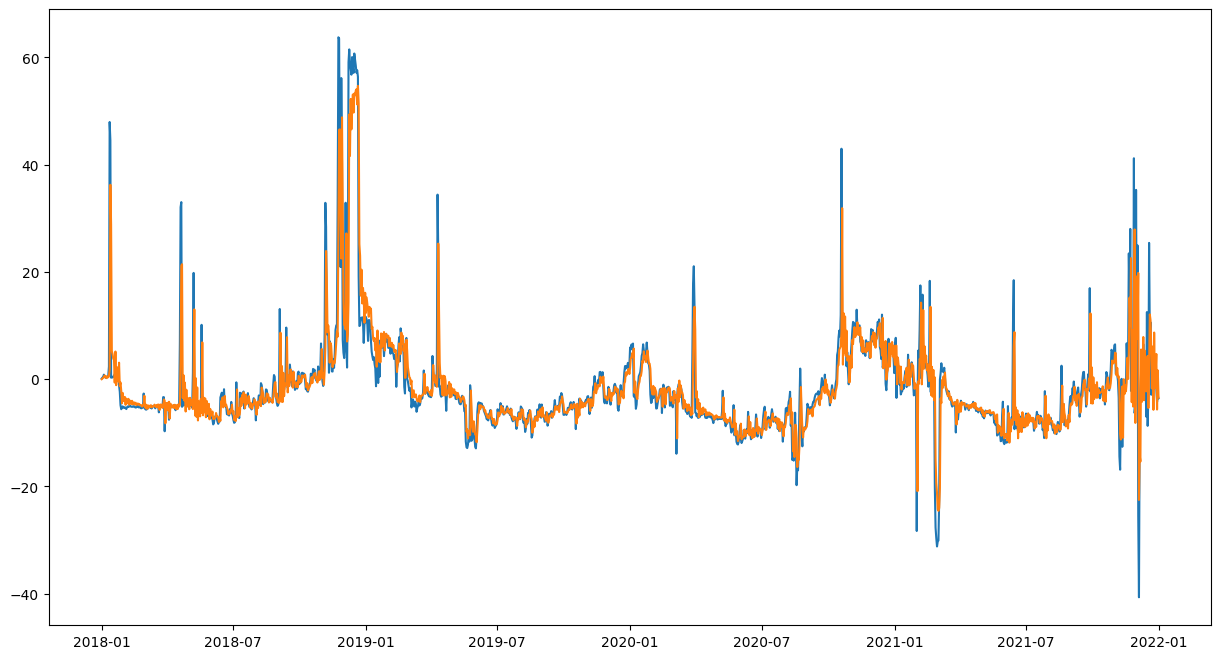

In [29]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [30]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [31]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [32]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [33]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [34]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 77.0348 - mae: 4.8775 - mape: 186.9577 - mse: 77.0348
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.3163 - mae: 2.9838 - mape: 406.0395 - mse: 44.3163
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 39.1543 - mae: 2.9682 - mape: 193.9173 - mse: 39.1543
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37.7720 - mae: 2.9810 - mape: 200.6736 - mse: 37.7720
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.7734 - mae: 2.8269 - mape: 178.3087 - mse: 35.7734
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33.7264 - mae: 2.6875 - mape: 171.1151 - mse: 33.7264
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32.2650 - mae: 2.6147 - mape: 174.3619 - mse: 32.2650
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.1767 - mae: 2.6077 - mape: 180.4113 - mse: 31.1767
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30.3945 - mae: 2.6600 - mape: 178.5145 - mse: 

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


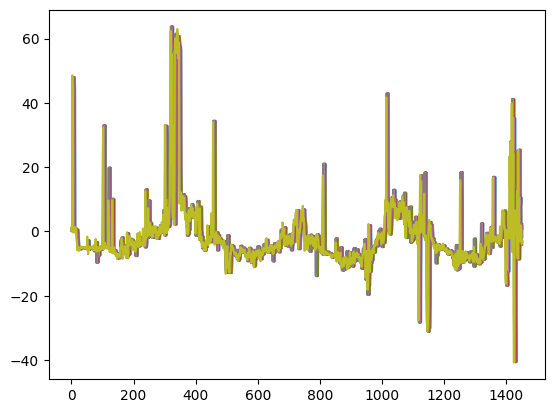

In [36]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

Modelo RNN Parametro Shuffle = True

In [37]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 21.4119 - mae: 3.2350 - mape: 243.9923 - mse: 21.4119
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.2228 - mae: 2.8865 - mape: 215.0843 - mse: 15.2228
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.1991 - mae: 2.4339 - mape: 201.9807 - mse: 11.1991
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1262 - mae: 1.6916 - mape: 125.3449 - mse: 6.1262
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8331 - mae: 1.5365 - mape: 123.3807 - mse: 4.8331
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2747 - mae: 1.3662 - mape: 85.9759 - mse: 4.2747 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.3379 - mae: 1.1555 - mape: 121.0046 - mse: 3.3379
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1527 - mae: 1.1142 - mape: 79.7727 - mse: 3.1527
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9415 - mae: 1.0443 - mape: 103.3943 - mse: 2.9415
Epoch

Epoch 19/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3232 - mae: 0.8200 - mape: 34.5038 - mse: 2.3232

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


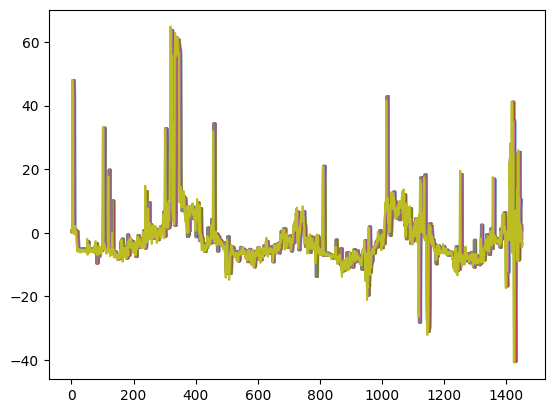

In [38]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

Modelo attention

In [39]:
from keras.layers import MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model

In [40]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [41]:
yw[:1]

array([[0.11218008, 0.29982054, 0.39446717, 0.84792471, 0.44392858,
        0.40758383, 0.2363925 , 0.48877958]])

In [42]:
np.flip(yw[:1])

array([[0.48877958, 0.2363925 , 0.40758383, 0.44392858, 0.84792471,
        0.39446717, 0.29982054, 0.11218008]])

In [43]:
tensor=tf.constant(yw[:1])
tensor

<tf.Tensor: shape=(1, 8), dtype=float64, numpy=
array([[0.11218008, 0.29982054, 0.39446717, 0.84792471, 0.44392858,
        0.40758383, 0.2363925 , 0.48877958]])>

In [44]:
import keras
from keras.layers import Lambda
layer = Lambda(lambda x: keras.ops.flip(x))
layer(tensor)

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[0.48877957, 0.2363925 , 0.40758383, 0.44392857, 0.8479247 ,
        0.39446718, 0.29982054, 0.11218008]], dtype=float32)>

In [45]:
d=128
input=Input(name="activity",shape=(8,1))
reverse=Lambda(lambda x: keras.ops.flip(x))(input)
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, reverse,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model=Model(inputs=input,outputs=output)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 8, 1)      │          0 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      1,025 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=128, epochs=4,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 93.4606 - mae: 6.2704 - mape: 100.5526 - mse: 93.4606
Epoch 2/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.1061 - mae: 4.5000 - mape: 135.1576 - mse: 58.1061
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.6696 - mae: 3.4563 - mape: 285.8548 - mse: 47.6696 
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.9255 - mae: 3.4022 - mape: 195.7400 - mse: 41.9255 


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


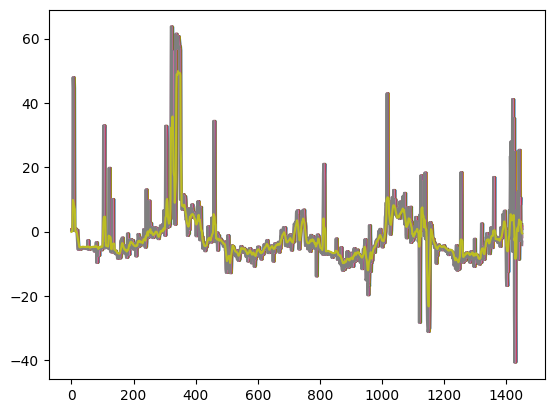

In [47]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [48]:
yw.shape

(1453, 8)

In [49]:
_,attention_scores=model.layers[2](yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                return_attention_scores=True)

In [50]:
attention_scores.shape

TensorShape([1, 1, 8, 8])

In [51]:
import seaborn as sb

In [52]:
timesteps = ["t"+str(i) for i in range(8)]
timesteps.reverse()

In [53]:
timesteps

['t7', 't6', 't5', 't4', 't3', 't2', 't1', 't0']

<Axes: >

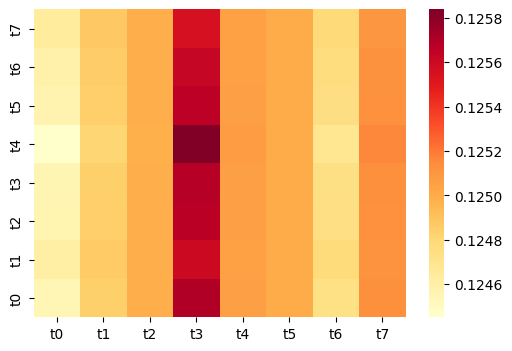

In [54]:
xticklb = timesteps.copy()
xticklb.reverse()
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [55]:
yw.shape

(1453, 8)

In [56]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [57]:
W=model.layers[1].get_weights()

In [58]:
componentes=["query","query_bias","key","key_bias","value","value_bias",
             "projection","projection"]
for name, out in zip(componentes,W):
    print(name, out.shape)

In [59]:
len(W)

0

In [60]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention = Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model2=Model(inputs=input,outputs=output)
model2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wq (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wv (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wk (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 8, 128)    │          0 │ wq[0][0],         │
│ (Attention)         │                   │            │ wv[0][0],         │
│                     │                   │            │ wk[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 8, 128)    │     16,512 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      1,025 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model2.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model2.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model2.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 62.1805 - mae: 4.7099 - mape: 207.0941 - mse: 62.1805 
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 46.9208 - mae: 4.0911 - mape: 210.8575 - mse: 46.9208
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 43.6394 - mae: 3.8325 - mape: 216.9509 - mse: 43.6394
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.8843 - mae: 3.6943 - mape: 216.4326 - mse: 43.8843
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 42.3297 - mae: 3.6862 - mape: 217.8850 - mse: 42.3297
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.2548 - mae: 3.5881 - mape: 265.2052 - mse: 43.2548
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 42.0299 - mae: 3.6363 - mape: 264.4631 - mse: 42.0299
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 42.9957 - mae: 3.5915 - mape: 295.2335 - mse: 42.9957
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 42.1692 - mae: 3.6296 - mape: 284.5728 - mse:

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


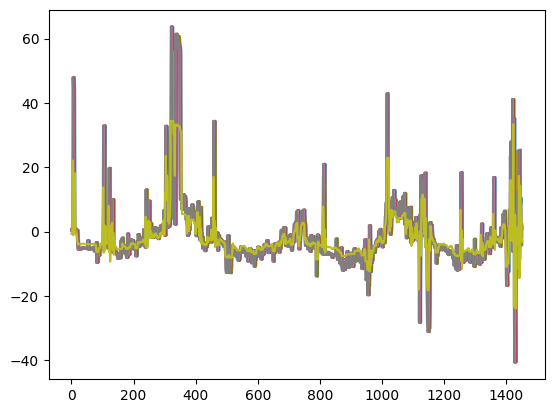

In [62]:
xw=[i for i in range(len(yw))]
yp=model2.predict(yw)
plt.plot(xw,yw,xw,yp)

In [63]:
attention_output,attention_scores=model2.layers[4]([yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1)],
                return_attention_scores=True)

<Axes: >

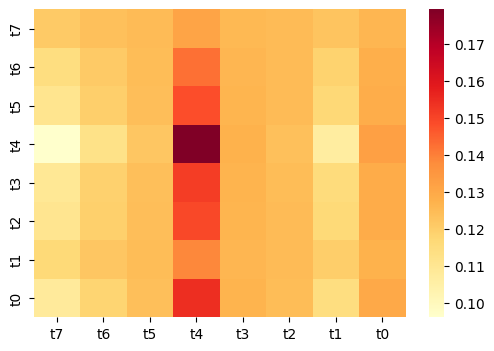

In [64]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [66]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model2.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model2.fit(yw, yt, batch_size=256, epochs=200, shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model2.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 43.7672 - mae: 3.7177 - mape: 288.4076 - mse: 43.7672 
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.8576 - mae: 3.6336 - mape: 294.1774 - mse: 43.8576
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.2919 - mae: 3.6622 - mape: 270.9826 - mse: 42.2919
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.5660 - mae: 3.6069 - mape: 310.3404 - mse: 43.5660
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 42.0491 - mae: 3.6708 - mape: 281.2686 - mse: 42.0491
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.7771 - mae: 3.5759 - mape: 300.8485 - mse: 42.7771
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 42.0499 - mae: 3.6378 - mape: 288.8585 - mse: 42.0499
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.2482 - mae: 3.5951 - mape: 297.6556 - mse: 42.2482
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.1889 - mae: 3.6119 - mape: 299.9355 - mse:

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


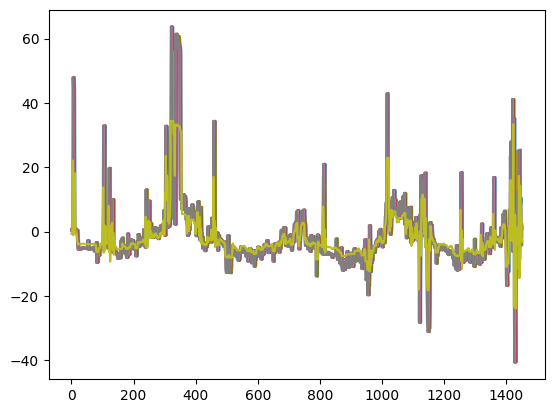

In [65]:
xw=[i for i in range(len(yw))]
yp=model2.predict(yw)
plt.plot(xw,yw,xw,yp)